### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

The independent variable is the ink colors while the dependent variable is the response time it takes to name the ink colors in equally-sized lists.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null hypothesis is that there is no difference in the response of time between the incongruent and the congruent conditions.<br />
&nbsp;&nbsp;&nbsp;&nbsp; H<sub>0</sub> : *$\mu$<sub>incongruent</sub>*  $=$ *$\mu$<sub>congruent</sub>* <br />

Alternate hypothesis is that the response time under the incongruent condition is significantly longer than the response time under the congruent condition. <br\>
&nbsp;&nbsp;&nbsp;&nbsp;    H<sub>1</sub> : *$\mu$<sub>incongruent</sub>*  $\gt$ *$\mu$<sub>congruent</sub>* <br />

We will be performing a one-tailed test to establish the relationship between the two response times since we will be assuming directionality and trying to show that the response time is longer in the incongruent case. We will also be choosing a dependent 
paired t-test since the response times of each respondent are paired samples with matched pairs of similar units (seconds of time). Since we have less than 30 samples and the population standard deviation is unknown, we will be using a t-score instead of a z-score. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [77]:
#Import the necessary libraries to work with my data
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import statsmodels.api as sm;
from scipy import stats;
import seaborn as sns;
%matplotlib inline

In [78]:
#Read in csv to dataframe
df = pd.read_csv('stroopdata.csv') 

In [79]:
df.head() #Check that the data imported and formatted correctly into dataframe

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [80]:
df.describe() #Looking at common stats for the dataframe

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


We can see that the average time to name colors in the congruent case is 14.05 seconds while the average time to name ink colors in the incongruent case is 22.02 seconds. The median time for naming ink colors is 14.36 seconds and 21.02 seconds for the congruent and incongruent case respectively. The inter-quartile range in the congruent case is 4.31 seconds while the inter-quartile range for the incongruent case is 5.33 seconds. The standard deviation of time is 3.559 seconds and 4.797 seconds for the congruent and incongruent cases respectively.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

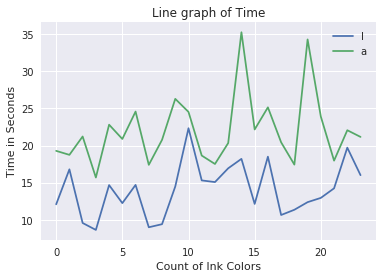

In [81]:
plt.plot(df);
plt.xlabel('Count of Ink Colors');
plt.ylabel('Time in Seconds');
plt.title('Line graph of Time');
plt.legend('labels');

It seems like both congruent and incongruent times follow the same up and down trend and they level off at about the sam place they started out at.

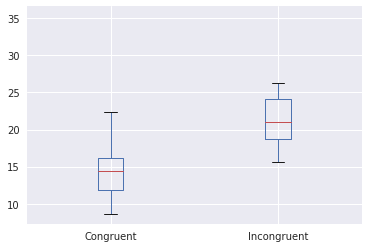

In [96]:
df.boxplot(['Congruent', 'Incongruent']);

The boxplot shows a clear difference in the mean of the congruent and incongruent cases. There does, however, appear to be some overlap in the data.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [72]:
# Create difference column
df['difference'] = df['Incongruent'] - df['Congruent']

In [76]:
#Use the scipy module to run a dependent t-test on the data
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [2]:
#Since the scipy module gives us the p-value for a two sided-test, we divide this by 2 to get the value for our one sided case
one_sided_p = 4.103e-08/2;
one_sided_p

2.0515e-08

The pvalue from this experiment is less than 0.05 and we thus reject the null hypothesis that there is no difference in the time taken to name the colors in the congruent and the incongruent case. Our Type I error associated with this test is 95%. These results matched my expectations that the incongruent case has a longer response time than the congruent case. I think what is being measured is the reaction time each individual takes to correctly identify the color of the text.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think there is a dissonance in the way people process written explicit information and the way they interpret the implicit information. Doing the first round of the Stroop test trains the brain that the color of the word is similar to its spelling. However, this training is thrown out the window in the second case because of the incongruence and our brain has to disassociate the color from the spelling. I would say that the famous Project Implicit from Harvard also incorporates the elements of the Stroop Effect but on a higher level. On the Implicit example, a person has to associate different races with words that appear on the screen in an attempt to reveal implicit bias in themselves. Both tasks involve recognizing that the brain has a default way it groups things and learning how to reassociate them.